## One Shot Experiment With the Convert Interacting ... task

In [ ]:
!pip install SciencePlots

In [ ]:
!git clone https://github.com/nmudur/HartreeFock_GPT.git

fatal: destination path 'HartreeFock_GPT' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import json
import pprint
import pandas as pd
import yaml
import numpy as np

### Rename final scored file

In [2]:
import yaml

In [ ]:
ONESHOT_DIR = '/content/drive/MyDrive/HF annotation/HartreeFock_Shared/experiments/fewshot_promptannotation/one-shot_10-11/'

In [ ]:
oneshot_scores = yaml.safe_load(open(os.path.join(ONESHOT_DIR, 'processed_oneshot_df_reverified_scores.yaml'), 'r'))

In [ ]:
oneshot_renamed = oneshot_scores.copy()
for paper in oneshot_renamed:
  for ph in oneshot_renamed[paper]['placeholder']:
    oneshot_renamed[paper]['placeholder'][ph]['score']['One-Shot (Haining)'] = oneshot_renamed[paper]['placeholder'][ph]['score']['One-Shot (Nayantara)']
    del oneshot_renamed[paper]['placeholder'][ph]['score']['One-Shot (Nayantara)']

In [ ]:
oneshot_renamed

{'1106.6060.tex': {'source': {'1106.6060.tex': [[221, 267]]},
  'placeholder': {'second_int_symbol': {'Zero-Shot': '$\\HH_{\\rm MF}$',
    'One-Shot': '$\\HH_{\\rm MF}$',
    'human': None,
    'score': {'Zero-Shot (Haining)': 2, 'One-Shot (Haining)': 2}},
   'single-particle|second-quantized': {'Zero-Shot': 'second-quantized',
    'One-Shot': 'second-quantized',
    'human': None,
    'score': {'Zero-Shot (Haining)': 2, 'One-Shot (Haining)': 2}},
   'real_creation_op': {'Zero-Shot': '$\\hat{C}^{\\dag}_{\\kk s}$',
    'One-Shot': '$\\hat{p}^{\\dag}_{x\\kk s}, \\hat{p}^{\\dag}_{y\\kk s}, \\hat{d}^{\\dag}_{\\kk s}$',
    'human': '$c_{\\alpha,s}^\\dagger(R_i)$',
    'score': {'Zero-Shot (Haining)': 0, 'One-Shot (Haining)': 2}},
   'momentum_creation_op': {'Zero-Shot': '$\\hat{p}^{\\dag}_{x\\kk s}, \\hat{p}^{\\dag}_{y\\kk s}, \\hat{d}^{\\dag}_{\\kk s}$',
    'One-Shot': '$\\hat{p}^{\\dag}_{k s}, \\hat{p}^{\\dag}_{k s}, \\hat{d}^{\\dag}_{k s}$',
    'human': '$c_{\\alpha,s}^\\dagger(k)$',


In [ ]:
# yaml.dump(oneshot_renamed, open(os.path.join(ONESHOT_DIR, 'processed_oneshot_df_reverified_scores_renamed.yaml'), 'w'))

In [ ]:
# reread and check

## Scoring before and after

In [ ]:
os.listdir(ONESHOT_DIR)

['oneshot_df_repeat.csv',
 'processed_oneshot_df.yaml',
 'oneshot_df.csv',
 'processed_oneshot_df_preHPreview.yaml',
 'processed_oneshot_df_reverified_scores.yaml',
 'placeholderwise_performance.png',
 'processed_oneshot_df_reverified_scores_renamed.yaml']

In [3]:
# oneshot_scores = yaml.safe_load(open(os.path.join(ONESHOT_DIR, 'processed_oneshot_df_reverified_scores_renamed.yaml'), 'r'))
oneshot_scores = yaml.safe_load(open( 'processed_oneshot_df_reverified_scores_renamed.yaml', 'r'))

In [4]:
len(oneshot_scores)

6

In [5]:
oneshot_scores

{'1106.6060.tex': {'placeholder': {'Note that interaction have no position dependence now': {'One-Shot': True,
    'Zero-Shot': True,
    'human': None,
    'score': {'One-Shot (Haining)': 2, 'Zero-Shot (Haining)': 2}},
   'definition_of_Fourier_Transformation': {'One-Shot': '$\\hat{p}^{\\dag}_{k s} = \\frac{1}{\\sqrt{N}} \\sum_i \\hat{p}^{\\dag}_{R_\\bm{i},s} e^{i k \\cdot R_i}$',
    'Zero-Shot': '$\\HH_{\\kk s}$',
    'human': '$c_{\\alpha,s}^\\dagger(k)= \\frac{1}{\\sqrt{N}} \\sum_i c_{\\alpha,s}^\\dagger(R_i) e^{i k \\cdot R_i}$',
    'score': {'One-Shot (Haining)': 2, 'Zero-Shot (Haining)': 0}},
   'momentum_creation_op': {'One-Shot': '$\\hat{p}^{\\dag}_{k s}, \\hat{p}^{\\dag}_{k s}, \\hat{d}^{\\dag}_{k s}$',
    'Zero-Shot': '$\\hat{p}^{\\dag}_{x\\kk s}, \\hat{p}^{\\dag}_{y\\kk s}, \\hat{d}^{\\dag}_{\\kk s}$',
    'human': '$c_{\\alpha,s}^\\dagger(k)$',
    'score': {'One-Shot (Haining)': 2, 'Zero-Shot (Haining)': 0}},
   'momentum_var': {'One-Shot': 'k',
    'Zero-Shot': '$s$',

In [6]:
oneshot_scores.keys()

dict_keys(['1106.6060.tex', '1310.2674.tex', '2008.08998.tex', '2012.04554.tex', '2110.11330.tex', '2308.03843.tex'])

In [7]:
import scipy

In [8]:
def aggregate(oneshot_scores, exclude_paper, placeholder_list):
  Nzs_occ = {0: 0, 1: 0, 2: 0}
  Nos_occ = {0: 0, 1: 0, 2: 0}
  pl_agg = {}
  for ph in placeholder_list:
    pl_agg[ph] = {'Zero-Shot': [], 'One-Shot': [], 'Number of Papers': 0}
  for paper in oneshot_scores:
    if paper==exclude_paper: # to exclude the example paper
      continue
    print(paper)
    for ph in placeholder_list:
      try:
        zs_score = int(oneshot_scores[paper]['placeholder'][ph]['score']['Zero-Shot (Haining)']) # casts everything to 0, 1, 2
        os_score = int(oneshot_scores[paper]['placeholder'][ph]['score']['One-Shot (Haining)'])
        Nzs_occ[zs_score] +=1
        Nos_occ[os_score] +=1

        pl_agg[ph]['Zero-Shot'].append(zs_score)
        pl_agg[ph]['One-Shot'].append(os_score)
        pl_agg[ph]['Number of Papers'] += 1
      except TypeError as e:
        print(paper, ph, e)

  for ph in pl_agg:
    pl_agg[ph]['Zero-Shot'] = np.array(pl_agg[ph]['Zero-Shot'])
    pl_agg[ph]['One-Shot'] = np.array(pl_agg[ph]['One-Shot'])
    pl_agg[ph]['Zero-Shot_mean'] = np.mean(pl_agg[ph]['Zero-Shot'])
    pl_agg[ph]['One-Shot_mean'] = np.mean(pl_agg[ph]['One-Shot'])
    pl_agg[ph]['Zero-Shot_sem'] = scipy.stats.sem(pl_agg[ph]['Zero-Shot'])
    pl_agg[ph]['One-Shot_sem'] = scipy.stats.sem(pl_agg[ph]['One-Shot'])
  return pl_agg, Nzs_occ, Nos_occ


In [9]:
pl_performance, zs_freq, os_freq = aggregate(oneshot_scores, '2110.11330.tex', list(oneshot_scores['1106.6060.tex']['placeholder'].keys()))

1106.6060.tex
1310.2674.tex
2008.08998.tex
2012.04554.tex
2308.03843.tex


In [10]:
pl_performance

{'Note that interaction have no position dependence now': {'Zero-Shot': array([2, 2, 0, 0, 0]),
  'One-Shot': array([2, 2, 0, 2, 0]),
  'Number of Papers': 5,
  'Zero-Shot_mean': 0.8,
  'One-Shot_mean': 1.2,
  'Zero-Shot_sem': 0.48989794855663565,
  'One-Shot_sem': 0.48989794855663565},
 'definition_of_Fourier_Transformation': {'Zero-Shot': array([0, 0, 0, 0, 0]),
  'One-Shot': array([2, 2, 2, 1, 0]),
  'Number of Papers': 5,
  'Zero-Shot_mean': 0.0,
  'One-Shot_mean': 1.4,
  'Zero-Shot_sem': 0.0,
  'One-Shot_sem': 0.39999999999999997},
 'momentum_creation_op': {'Zero-Shot': array([0, 1, 2, 0, 0]),
  'One-Shot': array([2, 2, 2, 2, 0]),
  'Number of Papers': 5,
  'Zero-Shot_mean': 0.6,
  'One-Shot_mean': 1.6,
  'Zero-Shot_sem': 0.3999999999999999,
  'One-Shot_sem': 0.39999999999999997},
 'momentum_var': {'Zero-Shot': array([0, 0, 2, 0, 2]),
  'One-Shot': array([2, 2, 2, 2, 2]),
  'Number of Papers': 5,
  'Zero-Shot_mean': 0.8,
  'One-Shot_mean': 2.0,
  'Zero-Shot_sem': 0.489897948556635

In [11]:
zs_freq

{0: 21, 1: 3, 2: 16}

In [12]:
os_freq

{0: 6, 1: 4, 2: 30}

In [13]:
np.array(list(zs_freq.values())).sum(), np.array(list(os_freq.values())).sum()

(40, 40)

In [14]:
pl_performance

{'Note that interaction have no position dependence now': {'Zero-Shot': array([2, 2, 0, 0, 0]),
  'One-Shot': array([2, 2, 0, 2, 0]),
  'Number of Papers': 5,
  'Zero-Shot_mean': 0.8,
  'One-Shot_mean': 1.2,
  'Zero-Shot_sem': 0.48989794855663565,
  'One-Shot_sem': 0.48989794855663565},
 'definition_of_Fourier_Transformation': {'Zero-Shot': array([0, 0, 0, 0, 0]),
  'One-Shot': array([2, 2, 2, 1, 0]),
  'Number of Papers': 5,
  'Zero-Shot_mean': 0.0,
  'One-Shot_mean': 1.4,
  'Zero-Shot_sem': 0.0,
  'One-Shot_sem': 0.39999999999999997},
 'momentum_creation_op': {'Zero-Shot': array([0, 1, 2, 0, 0]),
  'One-Shot': array([2, 2, 2, 2, 0]),
  'Number of Papers': 5,
  'Zero-Shot_mean': 0.6,
  'One-Shot_mean': 1.6,
  'Zero-Shot_sem': 0.3999999999999999,
  'One-Shot_sem': 0.39999999999999997},
 'momentum_var': {'Zero-Shot': array([0, 0, 2, 0, 2]),
  'One-Shot': array([2, 2, 2, 2, 2]),
  'Number of Papers': 5,
  'Zero-Shot_mean': 0.8,
  'One-Shot_mean': 2.0,
  'Zero-Shot_sem': 0.489897948556635

In [15]:
def placeholder():
    with open('Placeholder_name.yaml','r') as f:
        placeholder = yaml.safe_load(f)
    return placeholder

In [23]:
[naming[ph] if ph in naming else ph for ph in pl_performance.keys()]

['Note that interaction have no position dependence now',
 'definition_of_Fourier_Transformation',
 'momentum_creation_op',
 'momentum_var',
 'real_creation_op',
 'real_variable',
 'second_int_symbol',
 'single-particle|second-quantized']

In [17]:
pl_performance.keys()

dict_keys(['Note that interaction have no position dependence now', 'definition_of_Fourier_Transformation', 'momentum_creation_op', 'momentum_var', 'real_creation_op', 'real_variable', 'second_int_symbol', 'single-particle|second-quantized'])

In [18]:
new_order=['second_int_symbol','single-particle|second-quantized','real_creation_op','momentum_creation_op','definition_of_Fourier_Transformation','real_variable','momentum_var','Note that interaction have no position dependence now']

In [19]:
pl_performance_sorted={key:pl_performance[key] for key in new_order}

In [20]:
import textwrap

In [22]:
plt.rcParams['font.family']='Roboto'
plt.rcParams['font.size']=9

In [24]:
plt.rcParams["figure.dpi"] = 1000

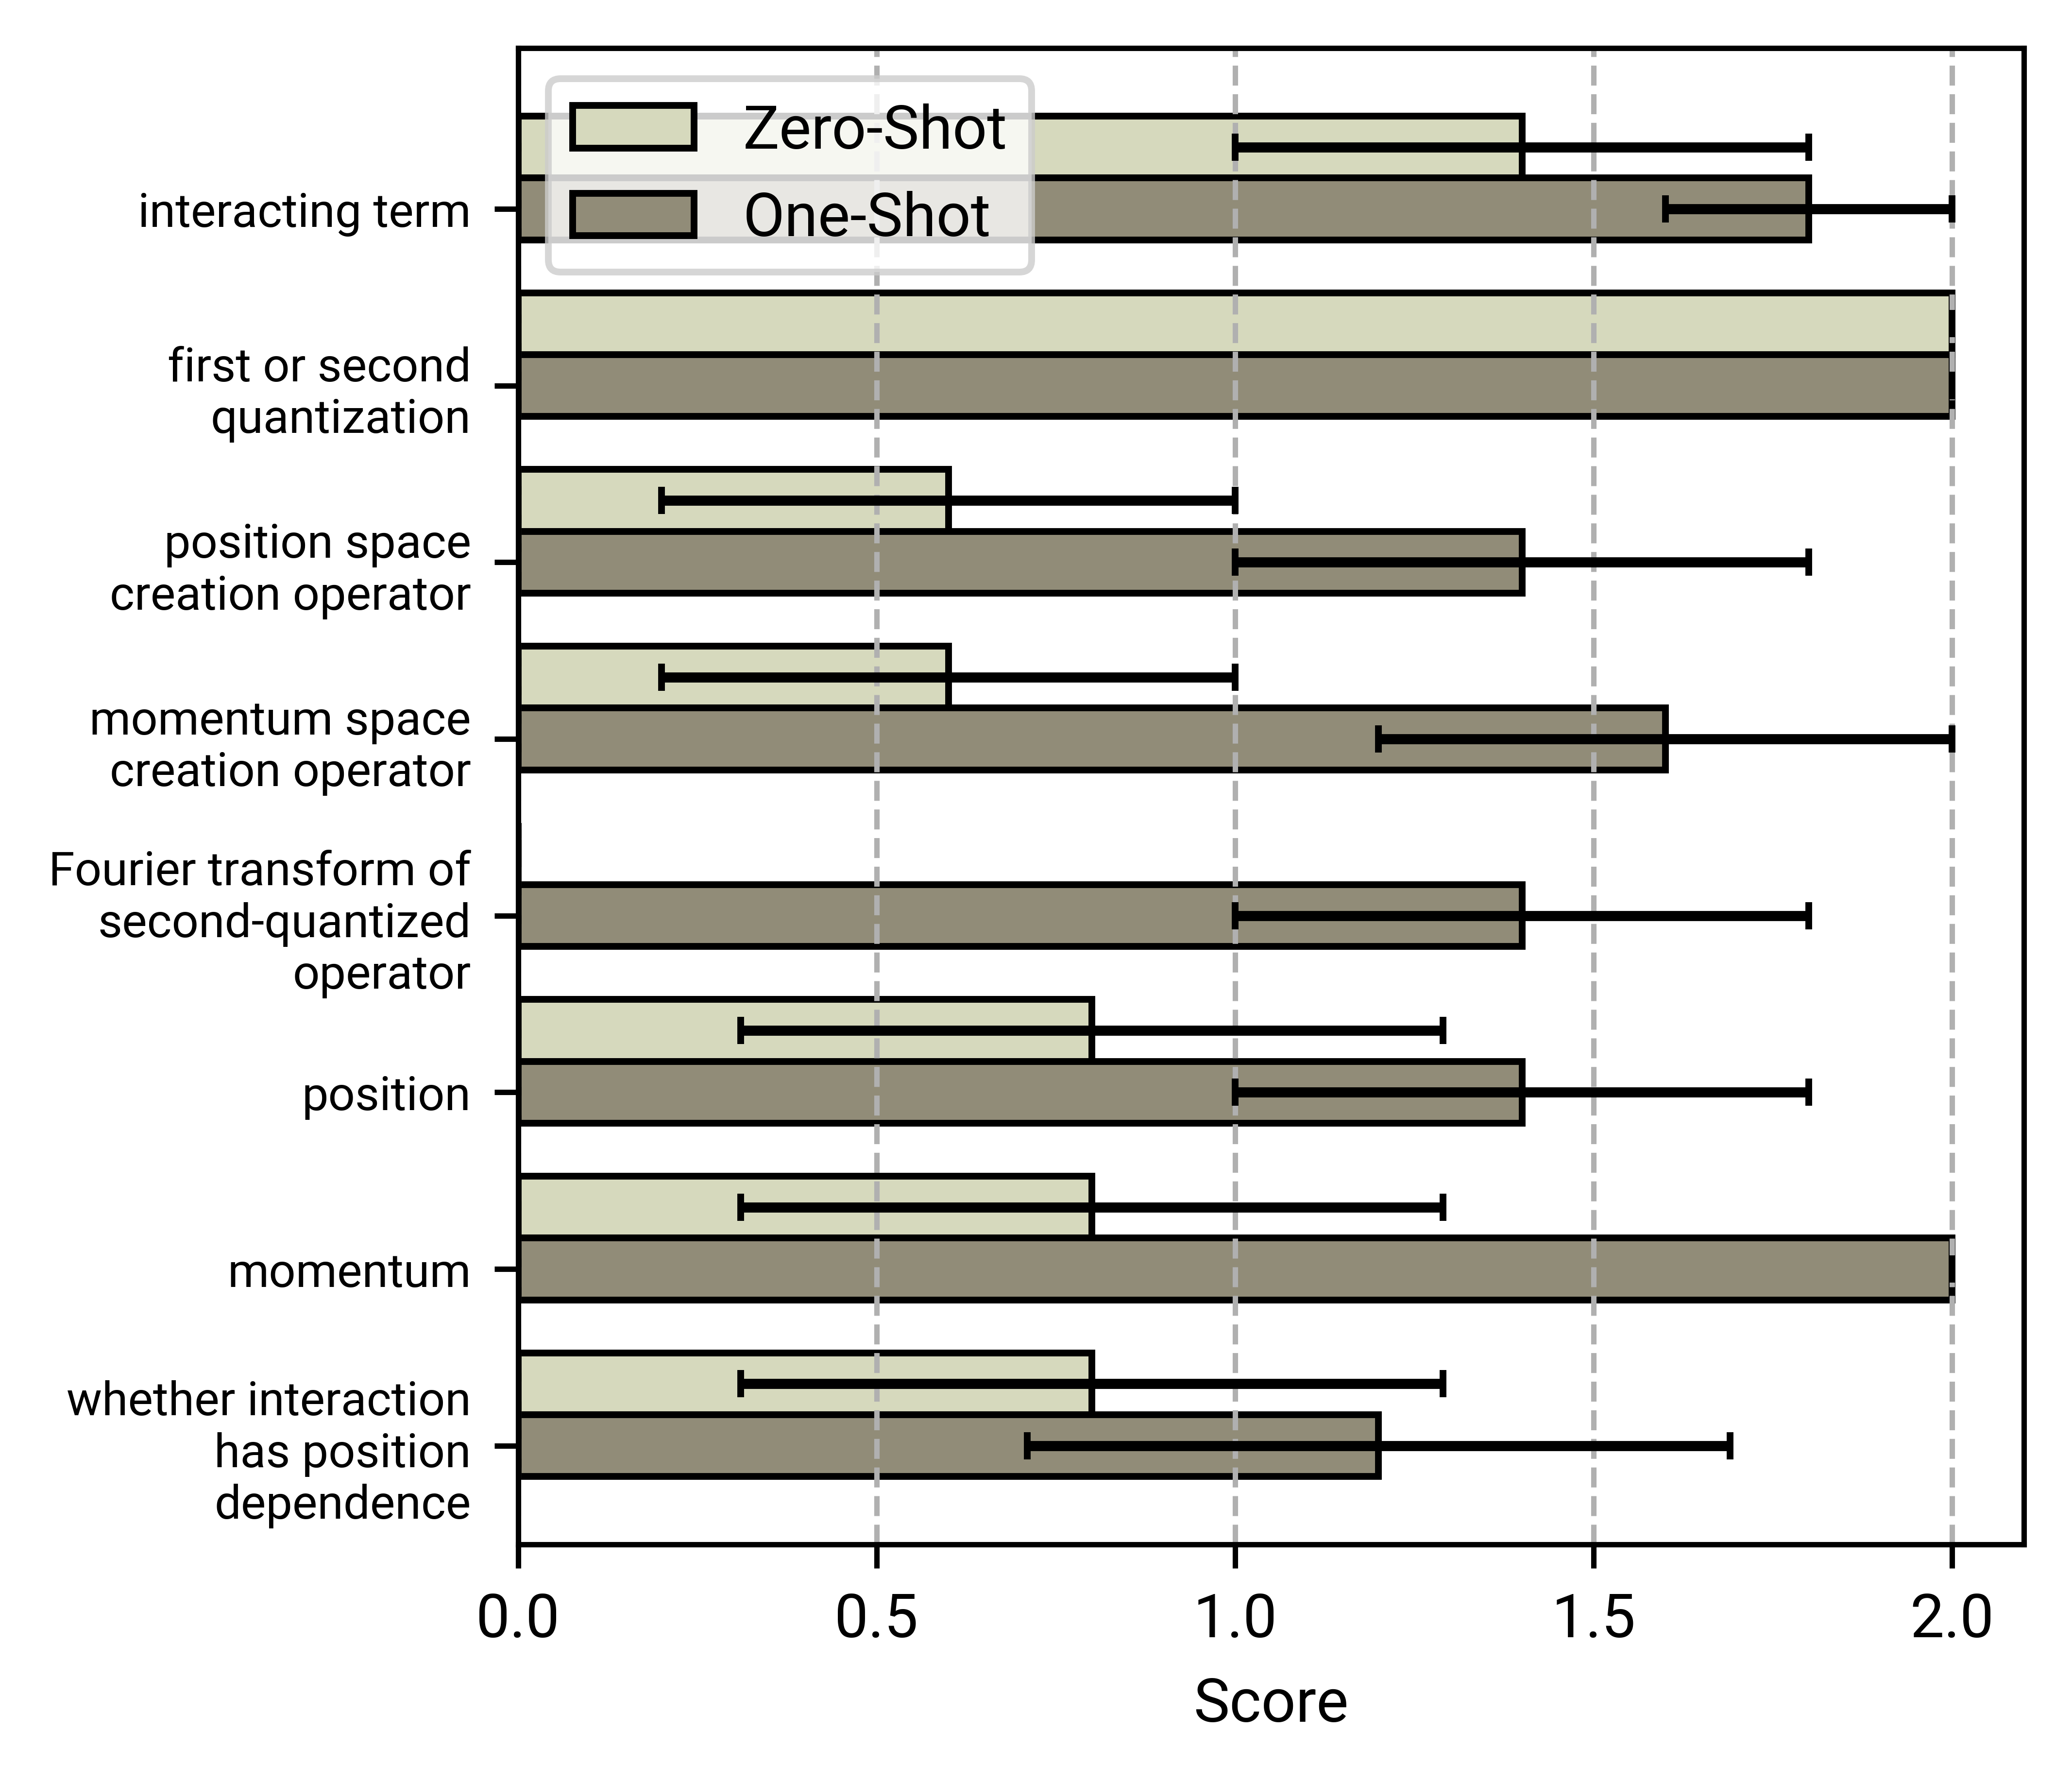

In [25]:
import matplotlib.pyplot as plt
# import scienceplots
# plt.style.use(['science', 'nature', 'no-latex', 'notebook'])
width = 0.35

fig, ax = plt.subplots(figsize=(4,4))
ax.barh(np.arange(8), [e['Zero-Shot_mean'] for e in pl_performance_sorted.values()], xerr=[e['Zero-Shot_sem'] for e in pl_performance_sorted.values()], height=width, label = 'Zero-Shot',capsize=2,edgecolor='k',color='#D6D9BD')
ax.barh(np.arange(8)+width, [e['One-Shot_mean'] for e in pl_performance_sorted.values()], xerr=[e['One-Shot_sem'] for e in pl_performance_sorted.values()], height=width, label = 'One-Shot',capsize=2,edgecolor='k',color='#918C78',)
ax.set_yticks(np.arange(8)+width, pl_performance_sorted.keys())
ax.legend()
ax.invert_yaxis()
# ax.set_yticklabels([placeholder()[ph] if ph in placeholder() else ph for ph in pl_performance_sorted.keys()])
ax.set_yticklabels(['\n'.join(textwrap.wrap(placeholder()[ph] if ph in placeholder() else ph, width=20)) for ph in pl_performance_sorted.keys()],fontsize=7)
# plt.savefig(os.path.join(ONESHOT_DIR, 'placeholderwise_performance.png'))
ax.set_xlabel('Score')
ax.grid(axis='x',ls='--')

fig.savefig('4i.pdf',bbox_inches='tight')

In [ ]:
print('Zero Shot Aggregate')
print((zs_freq[0]*0 + zs_freq[1]*1 + zs_freq[2]*2)/40)
print('One Shot Aggregate')
print((os_freq[0]*0 + os_freq[1]*1 + os_freq[2]*2)/40)

Zero Shot Aggregate
0.875
One Shot Aggregate
1.6


In [ ]:
# testing
import unittest
phname = 'second_int_symbol'
print(pl_performance[phname]['Zero-Shot'], [oneshot_scores[k]['placeholder'][phname]['score']['Zero-Shot (Haining)'] for k in oneshot_scores if k!='2110.11330.tex'])
print(pl_performance[phname]['One-Shot'], [oneshot_scores[k]['placeholder'][phname]['score']['One-Shot (Haining)'] for k in oneshot_scores if k!='2110.11330.tex'])

[2 0 2 1 2] [2, 0, 2, 1, 2]
[2 2 2 1 2] [2, 2, 2, 1, 2]


In [ ]:
pl_performance[phname]['Zero-Shot_mean'], pl_performance[phname]['One-Shot_mean']

(1.4, 1.8)